In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import MinMaxScaler

In [3]:
titanic = pd.read_csv(r"F:\ds\train_titanic.csv")
titanic_test =  pd.read_csv(r"F:\ds\test_titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic.shape


(891, 12)

In [6]:
titanic_test.shape

(418, 11)

<Axes: >

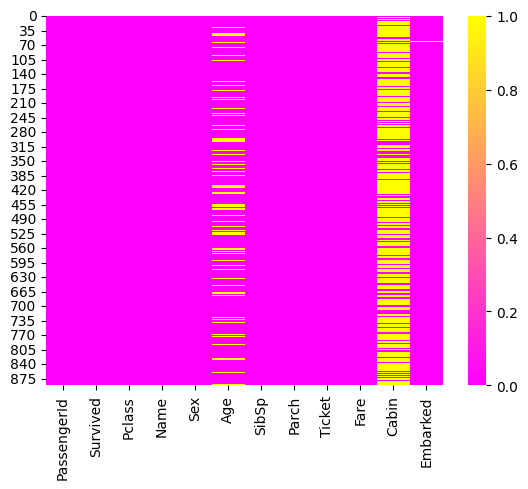

In [7]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: >

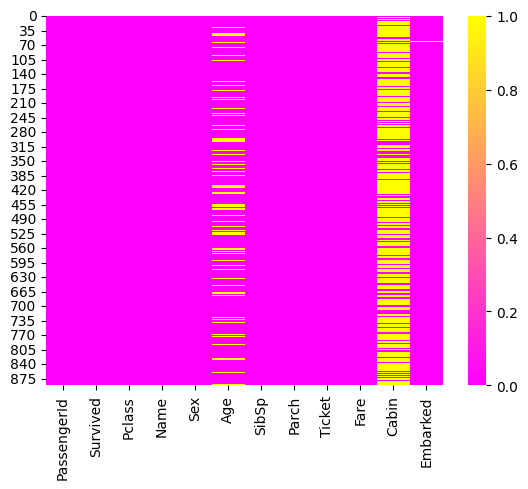

In [8]:
sns.heatmap(titanic.isnull(), cmap='spring')

In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)

In [12]:
titanic['Age'].fillna( titanic['Age'].mean(), inplace = True)
titanic_test['Age'].fillna( titanic_test['Age'].mean(), inplace = True)

In [13]:
print(titanic['Embarked'].mode())
print(titanic_test['Embarked'].mode())

0    S
Name: Embarked, dtype: object
0    S
Name: Embarked, dtype: object


In [14]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
titanic.dropna(inplace=True)
titanic_test.dropna(inplace=True)

In [17]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

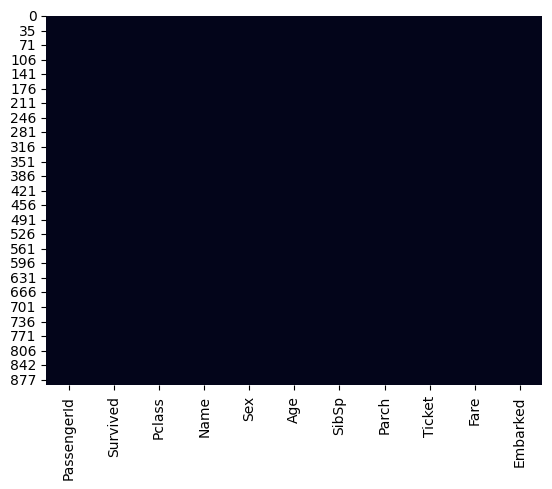

In [20]:
sns.heatmap( titanic.isnull(),cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

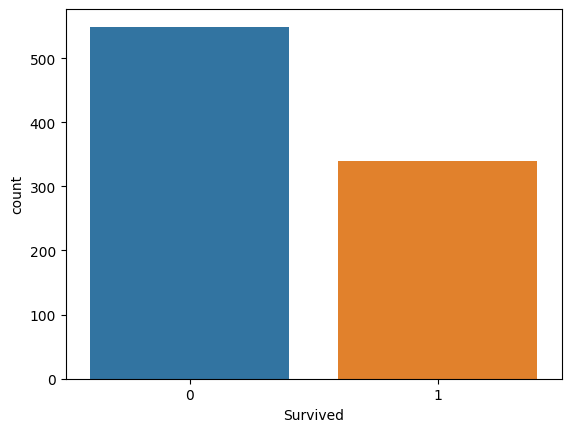

In [21]:
sns.countplot(x='Survived',data=titanic)

In [22]:
 titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

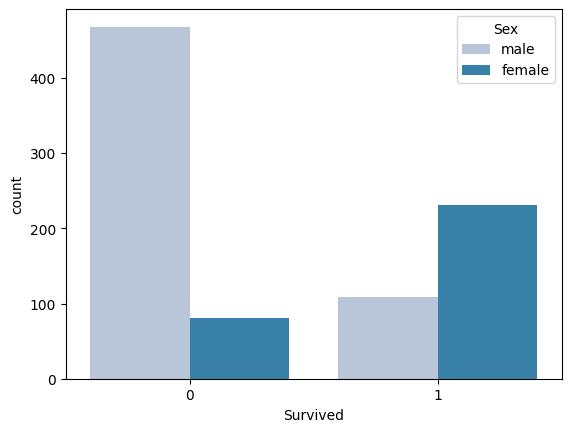

In [23]:
sns.countplot(x='Survived', hue='Sex',data= titanic , palette='PuBu')

<Axes: xlabel='Survived', ylabel='count'>

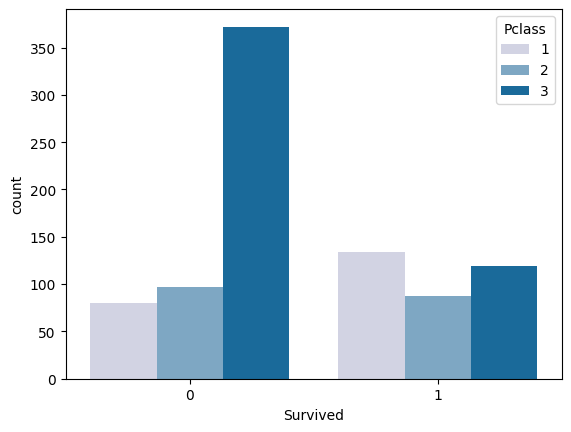

In [25]:
sns.countplot(x='Survived', hue='Pclass',data= titanic , palette='PuBu')

<Axes: ylabel='Frequency'>

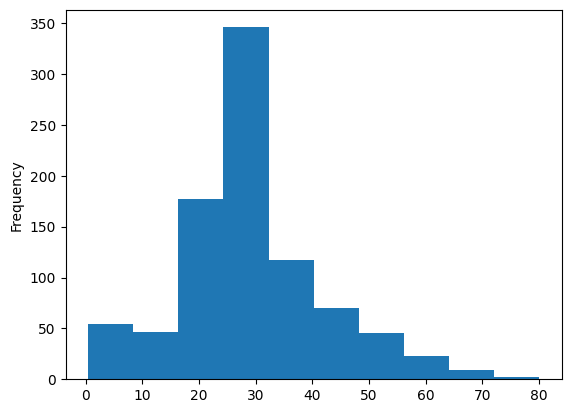

In [26]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

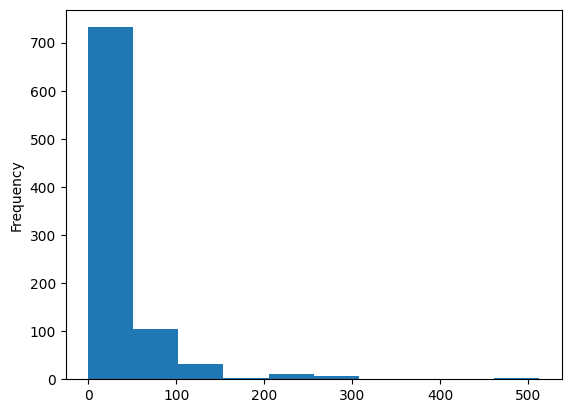

In [27]:
titanic['Fare'].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

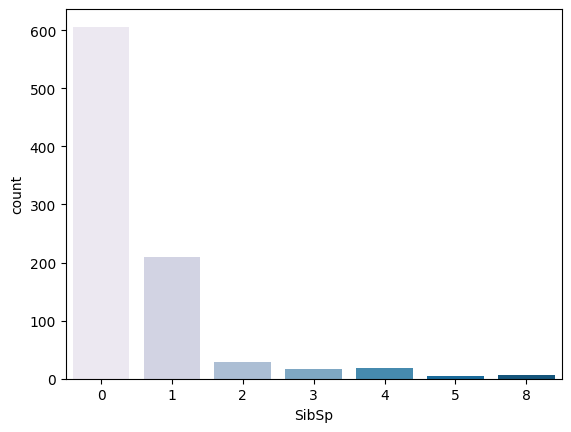

In [28]:
sns.countplot(x='SibSp', data=titanic, palette='PuBu')

<Axes: ylabel='Frequency'>

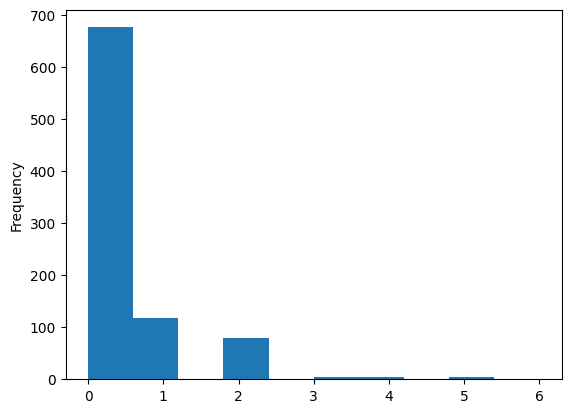

In [29]:
titanic['Parch'].plot.hist()

In [30]:
 titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<Axes: >

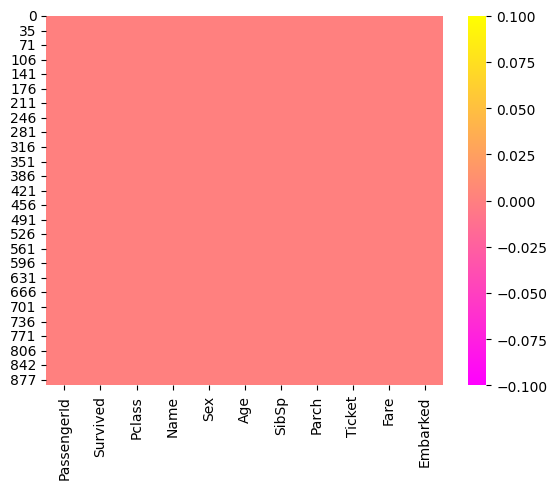

In [31]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

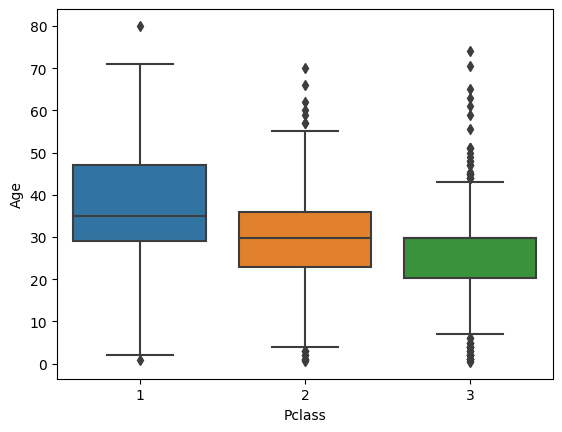

In [32]:
sns.boxplot(x='Pclass',y='Age', data = titanic)

In [33]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [34]:
#for test data
test_sex = pd.get_dummies(titanic_test['Sex'],drop_first=True)
test_embark = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
titanic_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic_test = pd.concat([titanic_test,test_sex,test_embark],axis=1)

In [35]:
#fill null value of fare column with 0
titanic_test.Fare.fillna(0 ,inplace = True)

In [61]:
##EDA VISUALISATION 

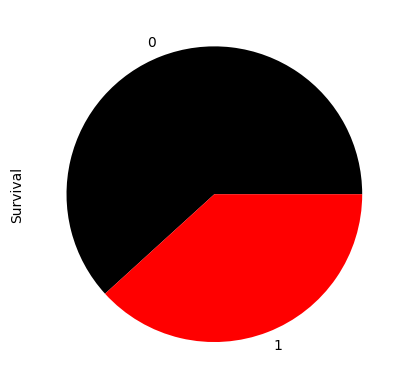

In [36]:
class_counts =  titanic['Survived'].value_counts()
colors = ['black', 'red']
class_counts.plot(kind='pie', colors=colors)
plt.ylabel('Survival')
plt.show()
#EDA stands for exploratory data analysis. 
#minority have titanic issues

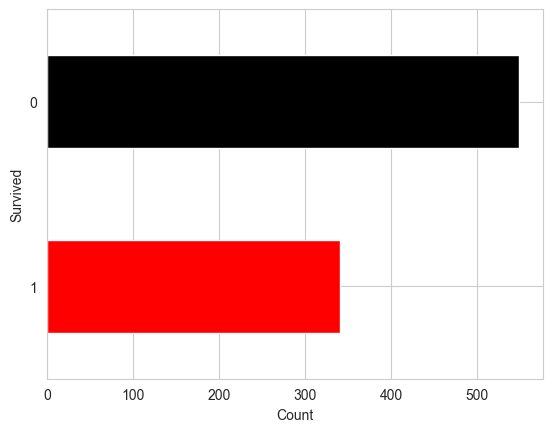

In [37]:
Survival_counts =  titanic['Survived'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black']
# Create horizontal bar chart of airline counts
Survival_counts.plot(kind='barh', color=colors)
plt.xlabel("Count")
plt.ylabel("Survived")
plt.show()

<Axes: xlabel='Survived'>

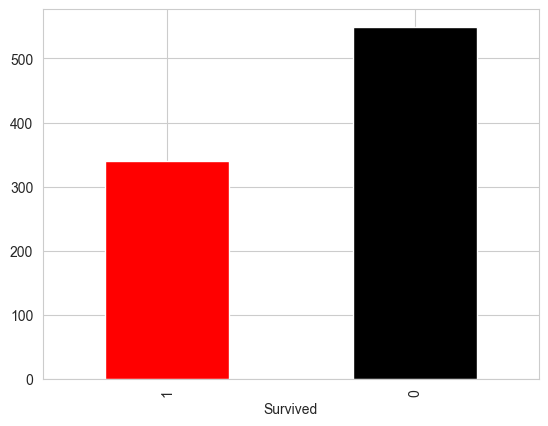

In [38]:
Survival_counts.plot(kind='bar', color=colors)
#made it vertical

In [39]:
cat_cols = list( titanic.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 4
Categorical columns:
['Name', 'Sex', 'Ticket', 'Embarked']


In [40]:
# PERFORMING TARGET ENCODING FOR ALL CATERGOTICAL VARIABLES
import category_encoders as ce
te = ce.TargetEncoder(cols=cat_cols)
titanic= te.fit_transform( titanic,  titanic['Survived'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0.332692,0.188908,22.000000,1,0,0.332692,7.2500,0.336957
1,2,1,1,0.462800,0.740385,38.000000,1,0,0.462800,71.2833,0.553571
2,3,1,3,0.462800,0.740385,26.000000,0,0,0.462800,7.9250,0.336957
3,4,1,1,0.462800,0.740385,35.000000,1,0,0.399126,53.1000,0.336957
4,5,0,3,0.332692,0.188908,35.000000,0,0,0.332692,8.0500,0.336957
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.332692,0.188908,27.000000,0,0,0.332692,13.0000,0.336957
887,888,1,1,0.462800,0.740385,19.000000,0,0,0.462800,30.0000,0.336957
888,889,0,3,0.332692,0.740385,29.699118,1,2,0.328201,23.4500,0.336957
889,890,1,1,0.462800,0.188908,26.000000,0,0,0.462800,30.0000,0.553571


In [41]:
numeric_cols =  titanic.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [42]:
# # MIN MAX SCALER
#we will discuss this. 
names =  titanic.columns
indexes =  titanic.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
titanic = sc.fit_transform( titanic)
data_scaled = pd.DataFrame( titanic, columns=names, index=indexes)
data_scaled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,0.0,1.0,0.0,0.0,0.271174,0.125,0.0,0.173168,0.014151,0.0
1,0.001124,1.0,0.0,1.0,1.0,0.472229,0.125,0.0,0.874015,0.139136,1.0
2,0.002247,1.0,1.0,1.0,1.0,0.321438,0.000,0.0,0.874015,0.015469,0.0
3,0.003371,1.0,0.0,1.0,1.0,0.434531,0.125,0.0,0.531026,0.103644,0.0
4,0.004494,0.0,1.0,0.0,0.0,0.434531,0.000,0.0,0.173168,0.015713,0.0


In [43]:
# SETTING TARGET VARIABLES
y = data_scaled['Survived']
# Extract the input features
x = data_scaled.drop(['PassengerId','Name','Ticket','Survived'], axis=1)

In [44]:
print(x)

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       1.0  0.0  0.271174  0.125  0.000000  0.014151  0.000000
1       0.0  1.0  0.472229  0.125  0.000000  0.139136  1.000000
2       1.0  1.0  0.321438  0.000  0.000000  0.015469  0.000000
3       0.0  1.0  0.434531  0.125  0.000000  0.103644  0.000000
4       1.0  0.0  0.434531  0.000  0.000000  0.015713  0.000000
..      ...  ...       ...    ...       ...       ...       ...
886     0.5  0.0  0.334004  0.000  0.000000  0.025374  0.000000
887     0.0  1.0  0.233476  0.000  0.000000  0.058556  0.000000
888     1.0  1.0  0.367921  0.125  0.333333  0.045771  0.000000
889     0.0  0.0  0.321438  0.000  0.000000  0.058556  1.000000
890     1.0  0.0  0.396833  0.000  0.000000  0.015127  0.242966

[889 rows x 7 columns]


In [45]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
model.fit(x_train, y_train)

LogisticRegression()

# LOGISTIC REGRESSION 

In [49]:
# Make predictions on the testing data
y_pred = model.predict(x_test)
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1.])

In [50]:
 # Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7921348314606742


In [51]:
#Metrics. In classification we use accuracy as key metric. In regression we use error as key metric. 
#(Mean square Error)

In [52]:
model.coef_

array([[-1.96039642,  2.56352709, -2.16337186, -1.54207086, -0.40039232,
         0.33385548,  0.56987992]])

In [53]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp, tn, fp, fn

(53, 88, 21, 16)

In [54]:
accuracy  = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.7921348314606742

In [55]:
precision  =  tp/(tp+fp)
precision 

0.7162162162162162

In [56]:
recall = tp/(tp+fn)
recall

0.7681159420289855

In [57]:
specificity = tn/(tn+fp)
specificity

0.8073394495412844

In [59]:
NPV = tn/(tn+fn)

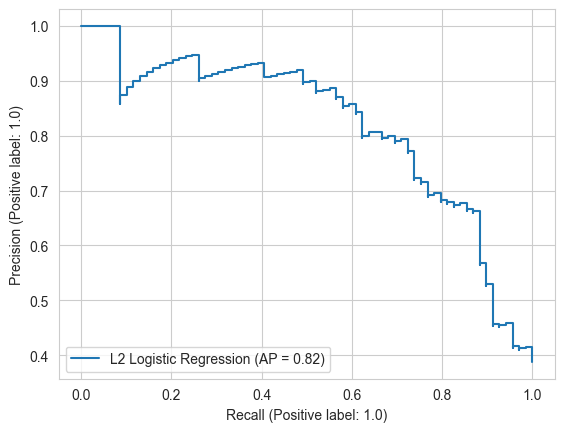

In [60]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, x_test, y_test, name = 'L2 Logistic Regression');